# TASK 1

I am Rohit Nagotkar and this is my implementation of QOSF screening task 1

## Objectives

*   Implement a Quantum circuit of L layers with two main blocks 'odd' and 'even'.
*  Rx is used in odd block and even block consists of Rz and Cz gates.
*  We have to calculate the minimum value of the distance between Ψ(θ)(which is obtained from the circuit) and Φ (which is a random vector of 4 qubits), with a certain combination of "theta(θ)" parameters.
*  We have to analyze how the number of layers affects the minimum distance.




# Installing Dependencies

In [1]:
!pip install qiskit -q --upgrade

import qiskit.tools.jupyter
%qiskit_version_table
%qiskit_copyright

In [2]:
!pip install pennylane --upgrade

Requirement already up-to-date: pennylane in /usr/local/lib/python3.6/dist-packages (0.11.0)


In [3]:
!pip install pennylane-qiskit

In [4]:
!pip install autograd tensorflow>=1.13.2

# Importing Libraries

In [5]:
import pennylane as qml
from math import sqrt
from pennylane import numpy as np
qml.about()

Name: PennyLane
Version: 0.11.0
Summary: PennyLane is a Python quantum machine learning library by Xanadu Inc.
Home-page: https://github.com/XanaduAI/pennylane
Author: None
Author-email: None
License: Apache License 2.0
Location: /usr/local/lib/python3.6/dist-packages
Requires: semantic-version, networkx, autograd, scipy, toml, numpy, appdirs
Required-by: PennyLane-qiskit
Platform info:           Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version:          3.6.9
Numpy version:           1.18.5
Scipy version:           1.4.1
Installed devices:
- default.gaussian (PennyLane-0.11.0)
- default.qubit (PennyLane-0.11.0)
- default.qubit.autograd (PennyLane-0.11.0)
- default.qubit.tf (PennyLane-0.11.0)
- default.tensor (PennyLane-0.11.0)
- default.tensor.tf (PennyLane-0.11.0)
- qiskit.aer (PennyLane-qiskit-0.11.0)
- qiskit.basicaer (PennyLane-qiskit-0.11.0)
- qiskit.ibmq (PennyLane-qiskit-0.11.0)


In [6]:
import qiskit
from qiskit import QuantumCircuit, execute, Aer
import math
from qiskit.visualization import plot_histogram,plot_bloch_multivector
import numpy as np_c
import random

#Global Variable

In [7]:
theta_vec = []


#Generate Φ vector

Pass: UnrollCustomDefinitions - 0.02050 (ms)
Begin BasisTranslator from source basis {('initialize', 1)} to target basis {'z', 'h', 'cz', 'u3', 'cu2', 'mcx', 'ccx', 'u2', 'y', 'id', 'barrier', 'snapshot', 'cu1', 'u1', 'sdg', 'mcu3', 'cu3', 'mcu2', 't', 'mcswap', 'initialize', 'unitary', 'diagonal', 'mcz', 'mcy', 'tdg', 'mcu1', 'multiplexer', 's', 'swap', 'measure', 'reset', 'cswap', 'cx', 'x'}.
Basis translation path search completed in 0.000s.
Basis translation paths composed in 0.000s.
Basis translation instructions replaced in 0.000s.
Pass: BasisTranslator - 10.95390 (ms)
Pass: RemoveResetInZeroState - 0.04601 (ms)
Pass: Depth - 0.05507 (ms)
Pass: FixedPoint - 0.03171 (ms)
Pass: Optimize1qGates - 0.08488 (ms)
Pass: CXCancellation - 0.05126 (ms)
Pass: Depth - 0.03648 (ms)
Pass: FixedPoint - 0.02432 (ms)
Pass: Optimize1qGates - 0.07653 (ms)
Pass: CXCancellation - 0.05269 (ms)
Total Transpile Time - 113.64865 (ms)
Total Assembly Time - 0.11659 (ms)
Total Job Submission Time - 0.51212 (

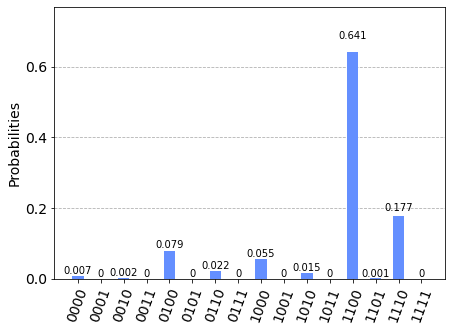

In [8]:
qc2 = QuantumCircuit(4)

t = np_c.random.rand()
qc2.initialize([t,sqrt(1-(t**2))],0)

t = np_c.random.rand()
qc2.initialize([t,sqrt(1-(t**2))],1)
t = np_c.random.rand()
qc2.initialize([t,sqrt(1-(t**2))],2)
t = np_c.random.rand()
qc2.initialize([t,sqrt(1-(t**2))],3)
qc2.draw()
# qc2.measure([0,1,2,3],[0,1,2,3])
simulator = Aer.get_backend('statevector_simulator')
job = execute(qc2, simulator)
result2 = job.result()
counts = result2.get_counts(qc2)
out_state = result2.get_statevector()
print(out_state)
plot_histogram(counts)

# Get list of theta values for every block


In [10]:

def get_theta(size=4):
  return [round(random.uniform(0,2*np_c.pi),6) for i in range(size)]
   

# Main Circuit Builder funcutons

In [12]:
global Lg
def set_L(l):
  global Lg
  Lg = l
  # print(Lg)
dev1 = qml.device("default.qubit", wires=4)
@qml.qnode(dev1)
def circuit(params):
  global Lg
  for j in range(Lg):
    for i in range(4):
      qml.RX(params[i+(j*8)],wires = i)
    for i in range(4):
      qml.RZ(params[i+4+(j*8)],wires = i)
    qml.CZ(wires = [0,1])
    qml.CZ(wires = [0,2])
    qml.CZ(wires = [0,3])
    qml.CZ(wires = [1,2])
    qml.CZ(wires = [1,3])
    qml.CZ(wires = [2,3])
    
  return qml.expval(qml.PauliZ(0)),qml.expval(qml.PauliZ(1)),qml.expval(qml.PauliZ(2)),qml.expval(qml.PauliZ(3))


# Input No. of layers and build circuits from 1-L

In [13]:
L = int(input("enter number of layers > "))
exp_list = []
temp = L
i=0
theta_vec = []
l = get_theta(8*(L))
for k in l :
  theta_vec.append(k)
while(temp):
  set_L(temp)
  exp_list.append(circuit(theta_vec))
  temp-=1

enter number of layers3
24 l


# Observe the L<sup>th</sup> layer circuit 

In [14]:
set_L(L)
print(type(circuit(theta_vec)))
print(circuit.draw())
  

<class 'numpy.ndarray'>
 0: ──RX(0.912)──RZ(4.753)──╭C──╭C──────╭C───RX(3.555)───RZ(2.887)─────────────╭C──────────╭C──────╭C───RX(5.001)───RZ(5.751)─────────────╭C──────────╭C──────╭C──────────┤ ⟨Z⟩ 
 1: ──RX(3.272)──RZ(1.433)──╰Z──│───╭C──│───╭C───────────RX(3.886)──RZ(4.209)──╰Z──────────│───╭C──│───╭C───────────RX(3.511)──RZ(0.025)──╰Z──────────│───╭C──│───╭C──────┤ ⟨Z⟩ 
 2: ──RX(2.067)──RZ(5.144)──────╰Z──╰Z──│───│───────────╭C──────────RX(1.332)───RZ(5.819)──╰Z──╰Z──│───│───────────╭C──────────RX(4.585)───RZ(0.893)──╰Z──╰Z──│───│───╭C──┤ ⟨Z⟩ 
 3: ──RX(2.261)──RZ(4.001)──────────────╰Z──╰Z──────────╰Z──────────RX(0.259)───RZ(4.579)──────────╰Z──╰Z──────────╰Z──────────RX(5.569)───RZ(5.905)──────────╰Z──╰Z──╰Z──┤ ⟨Z⟩ 



In [15]:
def cost(params):
  psi_theta = circuit(params)
  # print(psi_theta)
  phi = np.array([0 , 0.3, 0.5, 0])#phi_circuit()
  # print(phi)
  return np.linalg.norm((psi_theta - phi),ord=2) 


In [16]:
steps = 400
init_params = np.array(theta_vec)

qng_cost = []
opt =  qml.GradientDescentOptimizer(0.01)

set_L(L)
theta = init_params
# print(theta1,theta2)
print(theta)
for i in range(steps):
    theta = opt.step(cost,theta)
    qng_cost.append(cost(theta))
    if (i + 1) % 5 == 0:
      print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(theta)))

[0.911779 3.271538 2.067456 2.261148 4.752786 1.433119 5.143918 4.000567
 3.554965 3.885521 1.332312 0.259022 2.887393 4.209165 5.819231 4.578963
 5.000819 3.511155 4.584591 5.56912  5.750961 0.025479 0.892644 5.905438]
Cost after step     5:  1.2593134
Cost after step    10:  1.2059270
Cost after step    15:  1.1522017
Cost after step    20:  1.0984071
Cost after step    25:  1.0448236
Cost after step    30:  0.9917439
Cost after step    35:  0.9394733
Cost after step    40:  0.8883292
Cost after step    45:  0.8386393
Cost after step    50:  0.7907363
Cost after step    55:  0.7449500
Cost after step    60:  0.7015963
Cost after step    65:  0.6609609
Cost after step    70:  0.6232819
Cost after step    75:  0.5887298
Cost after step    80:  0.5573908
Cost after step    85:  0.5292542
Cost after step    90:  0.5042110
Cost after step    95:  0.4820621
Cost after step   100:  0.4625379
Cost after step   105:  0.4453239
Cost after step   110:  0.4300891
Cost after step   115:  0.416509

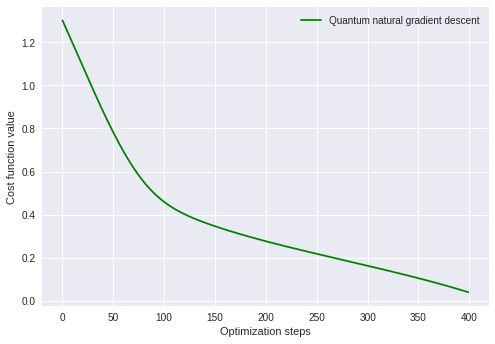

In [17]:
from matplotlib import pyplot as plt

plt.style.use("seaborn")
# plt.plot(gd_cost, "b", label="Vanilla gradient descent")
plt.plot(qng_cost, "g", label="Quantum natural gradient descent")

plt.ylabel("Cost function value")
plt.xlabel("Optimization steps")
plt.legend()
plt.show()

In [18]:
steps = 200
main_l = []
opt =  qml.GradientDescentOptimizer(0.01)

for layer in range(1,10):
  print(layer)
  theta = get_theta(8*(layer))
  init_params = np.array(theta_vec)   
  qng_cost = []
  set_L(layer)
  print(theta)
  circuit(theta)
  for i in range(steps):
    theta = opt.step(cost,theta)
    qng_cost.append(cost(theta))
    if (i + 1) % 5 == 0:
      print("Cost after step {:5d}: {: .7f}".format(i + 1, cost(theta)))
  main_l.append(cost(theta))
print(main_l)

1
[5.236221, 2.684324, 0.470296, 5.768795, 2.072286, 1.383653, 1.86029, 2.065872]
Cost after step     5:  1.5974597
Cost after step    10:  1.5835427
Cost after step    15:  1.5690533
Cost after step    20:  1.5539590
Cost after step    25:  1.5382259
Cost after step    30:  1.5218191
Cost after step    35:  1.5047025
Cost after step    40:  1.4868396
Cost after step    45:  1.4681929
Cost after step    50:  1.4487250
Cost after step    55:  1.4283985
Cost after step    60:  1.4071763
Cost after step    65:  1.3850223
Cost after step    70:  1.3619019
Cost after step    75:  1.3377821
Cost after step    80:  1.3126325
Cost after step    85:  1.2864256
Cost after step    90:  1.2591376
Cost after step    95:  1.2307490
Cost after step   100:  1.2012450
Cost after step   105:  1.1706163
Cost after step   110:  1.1388599
Cost after step   115:  1.1059793
Cost after step   120:  1.0719851
Cost after step   125:  1.0368955
Cost after step   130:  1.0007365
Cost after step   135:  0.9635422


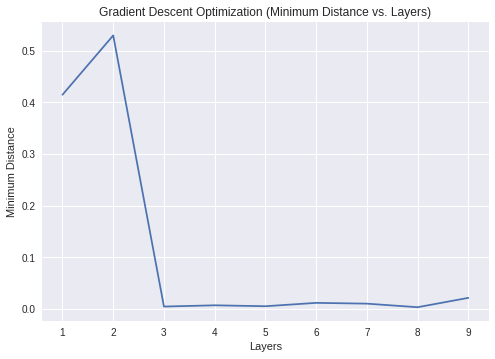

In [21]:
plt.title("Gradient Descent Optimization (Minimum Distance vs. Layers)")
plt.xlabel("Layers")
plt.ylabel("Minimum Distance")
plt.xticks(np.arange(10))
plt.plot([i for i in range(1,len(main_l)+1)],main_l)